In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

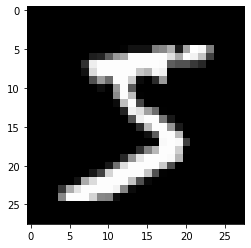

5


In [4]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

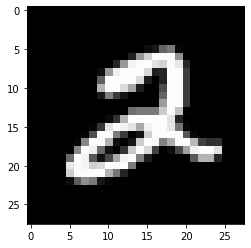

2


In [5]:
plt.imshow(X_train[5], cmap="gray")
plt.show()
print (y_train[5])

In [6]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [7]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
## Declare the model
model = Sequential()

## Declare the layers
#layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
#layer_2 = Conv2D(64, kernel_size=3, activation='relu')
#layer_3 = Flatten()
#layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
#model.add(Dropout(0.6))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(10, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'
import pydotplus as pydot
from keras.utils.vis_utils import plot_model
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)
model.test_on_batch(X_test, y_test)
model.metrics_names

Epoch 1/15
1875/1875 [==============================] - 308s 164ms/step - loss: 0.5674 - accuracy: 0.8992 - val_loss: 0.0797 - val_accuracy: 0.9748
Epoch 2/15
1875/1875 [==============================] - 360s 192ms/step - loss: 0.1471 - accuracy: 0.9566 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch 3/15
1875/1875 [==============================] - 304s 162ms/step - loss: 0.1195 - accuracy: 0.9646 - val_loss: 0.0449 - val_accuracy: 0.9843
Epoch 4/15
1875/1875 [==============================] - 342s 182ms/step - loss: 0.1041 - accuracy: 0.9675 - val_loss: 0.0489 - val_accuracy: 0.9843
Epoch 5/15
1875/1875 [==============================] - 341s 182ms/step - loss: 0.0952 - accuracy: 0.9713 - val_loss: 0.0416 - val_accuracy: 0.9857
Epoch 6/15
1875/1875 [==============================] - 357s 191ms/step - loss: 0.0895 - accuracy: 0.9732 - val_loss: 0.0434 - val_accuracy: 0.9855
Epoch 7/15
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0864 - accuracy: 0.9739 - val_l

['loss', 'accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


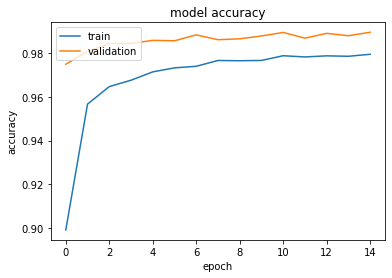

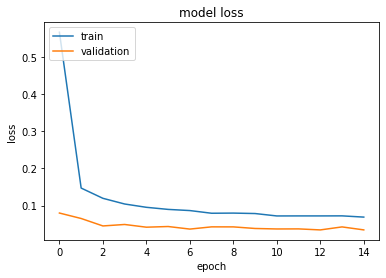

In [17]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
test_eval = model.evaluate(X_test, y_test, verbose=0)

In [19]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.03426625579595566
Test accuracy: 0.9894000291824341


Prediction (Softmax) from the neural network:

 [[9.9999082e-01 1.9446906e-14 6.4326186e-06 2.1599931e-09 2.8635005e-10
  5.3399574e-10 2.4477504e-06 3.8686632e-12 2.9111379e-07 4.3712131e-08]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




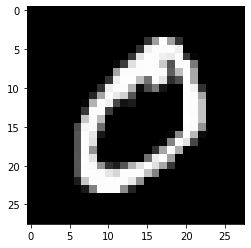



Final Output: 0


In [20]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))




----------------Contoured Image--------------------


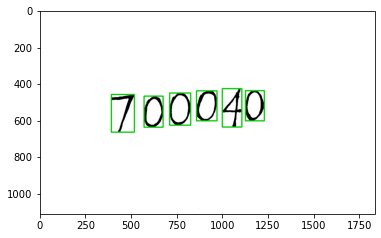

In [50]:
image = cv2.imread('calc.jpeg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 200, 0), thickness=5)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




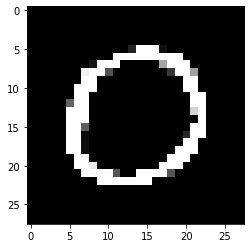



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1.0000000e+00 3.9306835e-21 8.5965957e-13 2.0067212e-16 4.3841525e-16
  8.2894499e-13 1.2347982e-10 9.3564710e-16 2.0222009e-13 4.3404275e-13]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




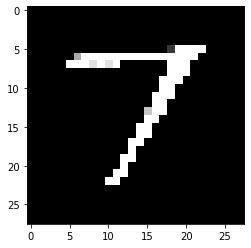



Final Output: 7

Prediction (Softmax) from the neural network:

 [[3.4042169e-16 1.5945048e-07 3.2530814e-05 4.5636037e-10 3.6908143e-11
  1.1998675e-14 2.4884769e-18 9.9996734e-01 2.4402436e-10 1.0492899e-13]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




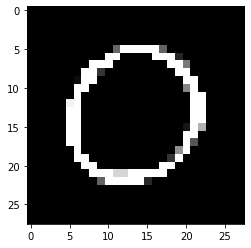



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1.0000000e+00 5.6104249e-19 4.3681587e-09 3.6308419e-12 1.5167599e-15
  2.4070188e-12 2.2648670e-08 6.1359195e-14 5.9591393e-10 5.7195599e-09]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




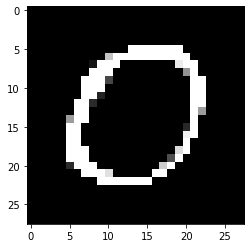



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9999964e-01 2.0364000e-18 3.8731778e-09 2.3678687e-10 4.4944743e-16
  1.0763501e-11 6.5100623e-09 3.8390723e-13 1.5496656e-08 3.3509525e-07]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




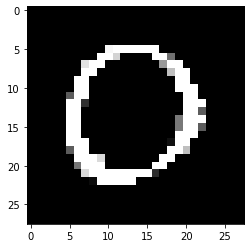



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1.0000000e+00 1.5755462e-21 6.2740890e-10 7.1942249e-14 4.1668396e-16
  5.2138502e-13 1.1624280e-11 1.1562479e-14 8.7901457e-12 1.4144158e-10]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




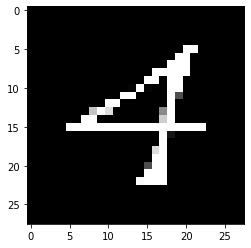



Final Output: 4

Prediction (Softmax) from the neural network:

 [[3.6935434e-27 1.6613101e-10 4.0564245e-12 2.9283759e-17 9.9999750e-01
  3.0426491e-13 1.1710479e-23 2.5469330e-06 2.9187460e-13 1.0785058e-18]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [43]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 0
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

In [62]:
import numpy as np
n=[2,3,4,6,0,7,8]
arr=np.array(n)
arr

array([2, 3, 4, 6, 0, 7, 8])

In [75]:
temp = (arr>5) & (arr<8)

In [76]:
arr[temp]

array([6, 7])